**1. Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

**2. Data Loading and Understanding**

In [2]:
# load the csv data to a pandas dataframe
df = pd.read_csv("Telco Customer Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [7]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

### Numerical Elements Analysis - HISTOGRAM

In [10]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()


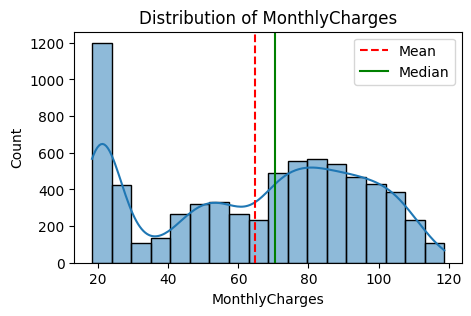

In [11]:
plot_histogram(df, "MonthlyCharges")

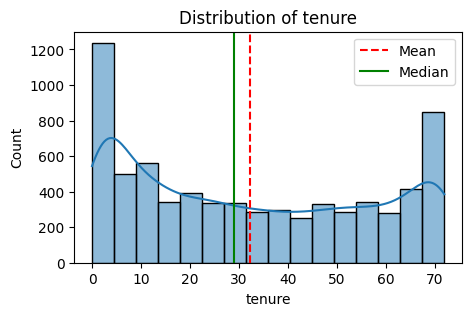

In [12]:
plot_histogram(df, "tenure")

### NUMERICAL ELEMENTS ANALYSIS - BOXPLOTS

In [13]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

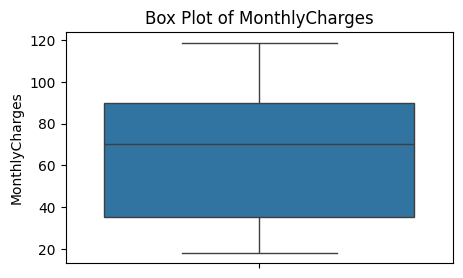

In [14]:
plot_boxplot(df, "MonthlyCharges")

In [ ]:
plot_boxplot(df, "TotalCharges")

In [ ]:
plot_boxplot(df, "tenure")

### CATEGORICAL ELEMENTS ANALYSIS - COUNTPLOT

In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"{col}")
  plt.show()

## DATA ANALYSIS

In [ ]:
import pandas as pd

# Load & clean dataset
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Calculate mode values for each feature, for stayed and churned groups
modes = {}
for col in df.columns.drop("Churn"):
    stay_mode = df[df["Churn"] == "No"][col].mode()[0]
    churn_mode = df[df["Churn"] == "Yes"][col].mode()[0]
    modes[col] = {"Stay": stay_mode, "Churn": churn_mode}

# Create summary DataFrame
profile_df = pd.DataFrame.from_dict(modes, orient='index')
profile_df.index.name = "Feature"
profile_df.reset_index(inplace=True)

# Display result
print(profile_df.to_string(index=False))


In [ ]:
# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop ID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Filter customers who stayed
not_churned = df[df["Churn"] == "No"]

# Categorical columns to plot
cat_cols = ["Contract", "PaymentMethod", "InternetService", "OnlineSecurity", "TechSupport"]

# Plot charts
plt.figure(figsize=(20, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=not_churned, x=col, order=not_churned[col].value_counts().index, palette="crest")
    plt.title(f"{col} (Stayed Customers)")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel("")
plt.tight_layout()
plt.show()


In [ ]:
# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")
# Filter customers who churned
churned = df[df["Churn"] == "Yes"]

# Plot same features for churned customers
plt.figure(figsize=(20, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=churned, x=col, order=churned[col].value_counts().index, palette="flare")
    plt.title(f"{col} (Churned Customers)")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel("")
plt.tight_layout()
plt.show()


In [ ]:
# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")
# Clean TotalCharges and drop ID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Split into two groups
stayed = df[df["Churn"] == "No"]
left = df[df["Churn"] == "Yes"]

# Select categorical columns
cat_cols = df.select_dtypes(include="object").columns.drop("Churn")

# Compare features
print(" Features common in STAYED customers but rare in CHURNED customers:\n")
for col in cat_cols:
    stayed_vals = stayed[col].value_counts(normalize=True)
    left_vals = left[col].value_counts(normalize=True)

    for val in stayed_vals.index:
        stayed_pct = stayed_vals[val]
        left_pct = left_vals[val] if val in left_vals else 0

        # Difference threshold (you can tweak this)
        if stayed_pct - left_pct > 0.2:
            print(f"- {col} = '{val}' → {stayed_pct:.0%} stayed vs. {left_pct:.0%} left")

print("\n Features common in CHURNED customers but rare in STAYED customers:\n")
for col in cat_cols:
    stayed_vals = stayed[col].value_counts(normalize=True)
    left_vals = left[col].value_counts(normalize=True)

    for val in left_vals.index:
        left_pct = left_vals[val]
        stayed_pct = stayed_vals[val] if val in stayed_vals else 0

        if left_pct - stayed_pct > 0.2:
            print(f"- {col} = '{val}' → {left_pct:.0%} left vs. {stayed_pct:.0%} stayed")


In [ ]:
#COMPARIN MONTHLY CHARGE OF CUSTOMER WHO CHURN AND STAY
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop customerID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Split into stayed and left groups
stayed = df[df["Churn"] == "No"]
left = df[df["Churn"] == "Yes"]

# Get bill stats
stayed_stats = stayed["MonthlyCharges"].describe()[["min", "50%", "max"]]
left_stats = left["MonthlyCharges"].describe()[["min", "50%", "max"]]

# Create summary DataFrame
summary = pd.DataFrame({
    "Customer Status": ["Stayed", "Churned"],
    "Min Monthly Bill ($)": [stayed_stats["min"], left_stats["min"]],
    "Median Monthly Bill ($)": [stayed_stats["50%"], left_stats["50%"]],
    "Max Monthly Bill ($)": [stayed_stats["max"], left_stats["max"]],
})

# Display result
summary


In [ ]:
#COMPARING TOTAL CHARGES OF CUSTOMER WHO CHURN AND STAY
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop customerID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Split into stayed and churned groups
stayed = df[df["Churn"] == "No"]
left = df[df["Churn"] == "Yes"]

# Get TotalCharges stats
stayed_stats = stayed["TotalCharges"].describe()[["min", "50%", "max"]]
left_stats = left["TotalCharges"].describe()[["min", "50%", "max"]]

# Create summary DataFrame
summary_total = pd.DataFrame({
    "Customer Status": ["Stayed", "Churned"],
    "Min Total Charges ($)": [stayed_stats["min"], left_stats["min"]],
    "Median Total Charges ($)": [stayed_stats["50%"], left_stats["50%"]],
    "Max Total Charges ($)": [stayed_stats["max"], left_stats["max"]],
})

# Display result
summary_total


In [ ]:
#WHAT TENURE THAT CUSTOMER CHURN THE MOST
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop customerID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Convert Churn to numeric: Yes=1, No=0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Group by tenure and calculate churn rate
churn_by_tenure = df.groupby("tenure")["Churn"].mean() * 100

# Plot churn rate by tenure
plt.figure(figsize=(12, 5))
sns.lineplot(x=churn_by_tenure.index, y=churn_by_tenure.values, color="red")
plt.title("Churn Rate by Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#COMPARING CUSTOMER THAT CHURN BEFORE AND AFTER 30TH MONTH WITH CUSTOMER THAT STAY AFTER 30TH MONTH
# Group 1: Churned before 30 months
df = pd.read_csv("Telco Customer Churn.csv")
churned_before_30 = df[(df["Churn"] == "Yes") & (df["tenure"] < 30)]

# Group 2: Churned after 30 months
churned_after_30 = df[(df["Churn"] == "Yes") & (df["tenure"] >= 30)]

# Group 3: Stayed after 30 months
stayed_after_30 = df[(df["Churn"] == "No") & (df["tenure"] >= 30)]

# Define features to analyze
features = ["Contract", "PaymentMethod", "InternetService", "OnlineSecurity", "TechSupport"]

# Collect most common values across all three groups
comparison = []

for feature in features:
    before_30 = churned_before_30[feature].mode()[0] if not churned_before_30.empty else "N/A"
    after_30 = churned_after_30[feature].mode()[0] if not churned_after_30.empty else "N/A"
    stayed_30 = stayed_after_30[feature].mode()[0] if not stayed_after_30.empty else "N/A"

    comparison.append([feature, before_30, after_30, stayed_30])

# Create and display the summary DataFrame
summary_all = pd.DataFrame(comparison, columns=[
    "Feature",
    "Churned < 30 Months",
    "Churned ≥ 30 Months",
    "Stayed ≥ 30 Months"
])

summary_all


In [ ]:
#WIHCH SERVICE MAKE CUSTOMER STAY
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# List of services to analyze
services = ["InternetService", "OnlineSecurity", "TechSupport", "StreamingTV", "StreamingMovies", "DeviceProtection"]

# Calculate average tenure by each service option
for service in services:
    print(f"\n Average Tenure by {service}:")
    print(df.groupby(service)["tenure"].mean().sort_values(ascending=False))


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop customerID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Convert churn to numeric: Yes = 1, No = 0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Create tenure ranges
bins = [0, 12, 24, 36, 48, 60, df["tenure"].max()]
labels = ["0–12", "13–24", "25–36", "37–48", "49–60", "60+"]

df["TenureRange"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)

# Calculate churn rate by tenure range
churn_by_tenure = df.groupby("TenureRange")["Churn"].mean() * 100

# Display result
print(" Churn Rate by Tenure Range (%):")
print(churn_by_tenure.round(2))


In [ ]:
# Filter stayed customers
stayed = df[df["Churn"] == 0]

# Services to analyze
service_features = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

print(" Percentage of Stayed Customers Who Don't Use Each Service:\n")

for feature in service_features:
    counts = stayed[feature].value_counts(normalize=True)
    no_usage = counts.get("No", 0) + counts.get("No internet service", 0)
    print(f"{feature}: {(no_usage * 100):.2f}%")


In [ ]:
import pandas as pd

# Load and clean dataset
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Filter stayed customers
stayed = df[df["Churn"] == "No"]

# List of service-related features
service_features = [
    "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# Calculate % of "Yes" responses for each feature
popular_services_pct = {}

for feature in service_features:
    total = len(stayed)
    yes_pct = (stayed[feature].value_counts(normalize=True).get("Yes", 0)) * 100
    popular_services_pct[feature] = round(yes_pct, 2)

# Convert to DataFrame and sort
popular_pct_df = pd.DataFrame.from_dict(popular_services_pct, orient='index', columns=["% Saying Yes"])
popular_pct_df = popular_pct_df.sort_values(by="% Saying Yes", ascending=False)

# Display result
print(" Percent of Stayed Customers Who Use Each Service")
print(popular_pct_df)


In [ ]:
pip install lime


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer

# 1. Load & clean data
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# 2. Encode categoricals
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    if col != "Churn":
        df[col] = le.fit_transform(df[col])
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# 3. Split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Setup LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["Stay", "Churn"],
    mode="classification"
)

# 6. Explain one test instance
i = 0  # pick an index
exp = explainer.explain_instance(
    X_test.iloc[i].values,
    model.predict_proba,
    num_features=10
)

# 7. Display
exp.show_in_notebook(show_table=True)
